In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [2]:
# Preprocessing

scenario= "circle" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 4 #8
var = 2
scales = ['-1-1','0-1']
scaled = '-1-1'

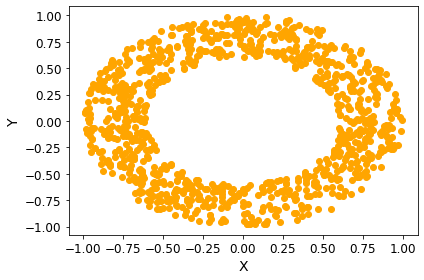

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64)           256         dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 64)           0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [6]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 2000 #500
batch_size = 100

In [7]:
aae = AAE_Model.AAE(Z, n_features, batch_size, GANorWGAN, nodes, var)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 64)           128         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 64)           256         dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 64)           0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

In [9]:
hist = aae.train(Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


1 [D real: -0.369238, D fake: 0.380150], [Enc/Dec loss: 0.789953, Enc/Dis: 0.794731]
2 [D real: -0.381566, D fake: 0.388773], [Enc/Dec loss: 0.811903, Enc/Dis: 0.816720]
3 [D real: -0.391320, D fake: 0.400556], [Enc/Dec loss: 0.818150, Enc/Dis: 0.823072]
4 [D real: -0.399149, D fake: 0.408902], [Enc/Dec loss: 0.786623, Enc/Dis: 0.791542]
5 [D real: -0.411374, D fake: 0.417313], [Enc/Dec loss: 0.769841, Enc/Dis: 0.774787]
6 [D real: -0.419426, D fake: 0.423085], [Enc/Dec loss: 0.762344, Enc/Dis: 0.767349]
7 [D real: -0.423107, D fake: 0.429946], [Enc/Dec loss: 0.758715, Enc/Dis: 0.763758]
8 [D real: -0.428179, D fake: 0.437909], [Enc/Dec loss: 0.753742, Enc/Dis: 0.758813]
9 [D real: -0.434475, D fake: 0.443404], [Enc/Dec loss: 0.739999, Enc/Dis: 0.745117]
10 [D real: -0.441458, D fake: 0.449678], [Enc/Dec loss: 0.736775, Enc/Dis: 0.741930]
11 [D real: -0.502270, D fake: 0.503281], [Enc/Dec loss: 0.655768, Enc/Dis: 0.661397]
12 [D real: -0.512153, D fake: 0.509971], [Enc/Dec loss: 0.6760

94 [D real: -0.953325, D fake: 0.957213], [Enc/Dec loss: 0.190904, Enc/Dis: 0.200744]
95 [D real: -0.954901, D fake: 0.958230], [Enc/Dec loss: 0.192893, Enc/Dis: 0.202731]
96 [D real: -0.955914, D fake: 0.958740], [Enc/Dec loss: 0.194869, Enc/Dis: 0.204706]
97 [D real: -0.955881, D fake: 0.959498], [Enc/Dec loss: 0.193110, Enc/Dis: 0.202948]
98 [D real: -0.957402, D fake: 0.960323], [Enc/Dec loss: 0.192226, Enc/Dis: 0.202069]
99 [D real: -0.958669, D fake: 0.960915], [Enc/Dec loss: 0.192615, Enc/Dis: 0.202466]
100 [D real: -0.959588, D fake: 0.961048], [Enc/Dec loss: 0.189574, Enc/Dis: 0.199428]
101 [D real: -0.967748, D fake: 0.960870], [Enc/Dec loss: 0.193202, Enc/Dis: 0.203119]
102 [D real: -0.966071, D fake: 0.965917], [Enc/Dec loss: 0.163158, Enc/Dis: 0.173053]
103 [D real: -0.967609, D fake: 0.966551], [Enc/Dec loss: 0.173369, Enc/Dis: 0.183278]
104 [D real: -0.967929, D fake: 0.967535], [Enc/Dec loss: 0.168825, Enc/Dis: 0.178731]
105 [D real: -0.968563, D fake: 0.968834], [Enc/D

189 [D real: -0.998177, D fake: 0.998285], [Enc/Dec loss: 0.126632, Enc/Dis: 0.136755]
190 [D real: -0.998227, D fake: 0.998323], [Enc/Dec loss: 0.127456, Enc/Dis: 0.137580]
191 [D real: -0.998642, D fake: 0.998500], [Enc/Dec loss: 0.116004, Enc/Dis: 0.126118]
192 [D real: -0.998637, D fake: 0.998572], [Enc/Dec loss: 0.108429, Enc/Dis: 0.118536]
193 [D real: -0.998581, D fake: 0.998545], [Enc/Dec loss: 0.115202, Enc/Dis: 0.125315]
194 [D real: -0.998600, D fake: 0.998609], [Enc/Dec loss: 0.116421, Enc/Dis: 0.126536]
195 [D real: -0.998631, D fake: 0.998663], [Enc/Dec loss: 0.119469, Enc/Dis: 0.129587]
196 [D real: -0.998660, D fake: 0.998704], [Enc/Dec loss: 0.118674, Enc/Dis: 0.128792]
197 [D real: -0.998684, D fake: 0.998733], [Enc/Dec loss: 0.120785, Enc/Dis: 0.130905]
198 [D real: -0.998717, D fake: 0.998764], [Enc/Dec loss: 0.123070, Enc/Dis: 0.133193]
199 [D real: -0.998741, D fake: 0.998805], [Enc/Dec loss: 0.120401, Enc/Dis: 0.130521]
200 [D real: -0.998757, D fake: 0.998826], 

284 [D real: -0.999944, D fake: 0.999951], [Enc/Dec loss: 0.116295, Enc/Dis: 0.126421]
285 [D real: -0.999944, D fake: 0.999951], [Enc/Dec loss: 0.106176, Enc/Dis: 0.116292]
286 [D real: -0.999944, D fake: 0.999950], [Enc/Dec loss: 0.106920, Enc/Dis: 0.117037]
287 [D real: -0.999945, D fake: 0.999952], [Enc/Dec loss: 0.108319, Enc/Dis: 0.118437]
288 [D real: -0.999947, D fake: 0.999952], [Enc/Dec loss: 0.106568, Enc/Dis: 0.116684]
289 [D real: -0.999949, D fake: 0.999951], [Enc/Dec loss: 0.106058, Enc/Dis: 0.116174]
290 [D real: -0.999950, D fake: 0.999951], [Enc/Dec loss: 0.104076, Enc/Dis: 0.114190]
291 [D real: -0.999956, D fake: 0.999958], [Enc/Dec loss: 0.086072, Enc/Dis: 0.096168]
292 [D real: -0.999956, D fake: 0.999956], [Enc/Dec loss: 0.089195, Enc/Dis: 0.099294]
293 [D real: -0.999959, D fake: 0.999960], [Enc/Dec loss: 0.100586, Enc/Dis: 0.110697]
294 [D real: -0.999960, D fake: 0.999960], [Enc/Dec loss: 0.101670, Enc/Dis: 0.111781]
295 [D real: -0.999960, D fake: 0.999960], 

379 [D real: -0.999977, D fake: 0.999950], [Enc/Dec loss: 0.098853, Enc/Dis: 0.108961]
380 [D real: -0.999977, D fake: 0.999948], [Enc/Dec loss: 0.097476, Enc/Dis: 0.107583]
381 [D real: -0.999977, D fake: 0.999962], [Enc/Dec loss: 0.072716, Enc/Dis: 0.082799]
382 [D real: -0.999971, D fake: 0.999957], [Enc/Dec loss: 0.073704, Enc/Dis: 0.083787]
383 [D real: -0.999973, D fake: 0.999951], [Enc/Dec loss: 0.081475, Enc/Dis: 0.091566]
384 [D real: -0.999973, D fake: 0.999954], [Enc/Dec loss: 0.078905, Enc/Dis: 0.088993]
385 [D real: -0.999975, D fake: 0.999956], [Enc/Dec loss: 0.083858, Enc/Dis: 0.093951]
386 [D real: -0.999977, D fake: 0.999957], [Enc/Dec loss: 0.084683, Enc/Dis: 0.094777]
387 [D real: -0.999978, D fake: 0.999957], [Enc/Dec loss: 0.085611, Enc/Dis: 0.095706]
388 [D real: -0.999978, D fake: 0.999959], [Enc/Dec loss: 0.085883, Enc/Dis: 0.095978]
389 [D real: -0.999978, D fake: 0.999960], [Enc/Dec loss: 0.087507, Enc/Dis: 0.097604]
390 [D real: -0.999979, D fake: 0.999960], 

474 [D real: -0.999919, D fake: 0.999633], [Enc/Dec loss: 0.089540, Enc/Dis: 0.099633]
475 [D real: -0.999922, D fake: 0.999646], [Enc/Dec loss: 0.086834, Enc/Dis: 0.096925]
476 [D real: -0.999916, D fake: 0.999646], [Enc/Dec loss: 0.087006, Enc/Dis: 0.097097]
477 [D real: -0.999919, D fake: 0.999615], [Enc/Dec loss: 0.090125, Enc/Dis: 0.100219]
478 [D real: -0.999920, D fake: 0.999601], [Enc/Dec loss: 0.087657, Enc/Dis: 0.097749]
479 [D real: -0.999919, D fake: 0.999623], [Enc/Dec loss: 0.088330, Enc/Dis: 0.098422]
480 [D real: -0.999924, D fake: 0.999590], [Enc/Dec loss: 0.087805, Enc/Dis: 0.097896]
481 [D real: -0.999933, D fake: 0.999532], [Enc/Dec loss: 0.087386, Enc/Dis: 0.097480]
482 [D real: -0.999941, D fake: 0.999641], [Enc/Dec loss: 0.091918, Enc/Dis: 0.102015]
483 [D real: -0.999936, D fake: 0.999650], [Enc/Dec loss: 0.092866, Enc/Dis: 0.102965]
484 [D real: -0.999934, D fake: 0.999624], [Enc/Dec loss: 0.088136, Enc/Dis: 0.098229]
485 [D real: -0.999938, D fake: 0.999535], 

569 [D real: -0.999696, D fake: 0.996744], [Enc/Dec loss: 0.081955, Enc/Dis: 0.092012]
570 [D real: -0.999674, D fake: 0.996809], [Enc/Dec loss: 0.083781, Enc/Dis: 0.093840]
571 [D real: -0.999740, D fake: 0.996385], [Enc/Dec loss: 0.076966, Enc/Dis: 0.087025]
572 [D real: -0.999705, D fake: 0.997001], [Enc/Dec loss: 0.075730, Enc/Dis: 0.085772]
573 [D real: -0.999652, D fake: 0.996824], [Enc/Dec loss: 0.077858, Enc/Dis: 0.087903]
574 [D real: -0.999653, D fake: 0.996742], [Enc/Dec loss: 0.082036, Enc/Dis: 0.092086]
575 [D real: -0.999684, D fake: 0.996486], [Enc/Dec loss: 0.079499, Enc/Dis: 0.089548]
576 [D real: -0.999623, D fake: 0.996455], [Enc/Dec loss: 0.078866, Enc/Dis: 0.088918]
577 [D real: -0.999622, D fake: 0.996345], [Enc/Dec loss: 0.077559, Enc/Dis: 0.087610]
578 [D real: -0.999626, D fake: 0.996355], [Enc/Dec loss: 0.078384, Enc/Dis: 0.088436]
579 [D real: -0.999520, D fake: 0.996432], [Enc/Dec loss: 0.079256, Enc/Dis: 0.089309]
580 [D real: -0.999517, D fake: 0.996264], 

664 [D real: -0.998429, D fake: 0.988902], [Enc/Dec loss: 0.081252, Enc/Dis: 0.091234]
665 [D real: -0.998371, D fake: 0.989395], [Enc/Dec loss: 0.082136, Enc/Dis: 0.092120]
666 [D real: -0.998485, D fake: 0.988796], [Enc/Dec loss: 0.081483, Enc/Dis: 0.091463]
667 [D real: -0.998572, D fake: 0.989618], [Enc/Dec loss: 0.082090, Enc/Dis: 0.092065]
668 [D real: -0.998453, D fake: 0.990158], [Enc/Dec loss: 0.079403, Enc/Dis: 0.089375]
669 [D real: -0.998458, D fake: 0.990294], [Enc/Dec loss: 0.078682, Enc/Dis: 0.088654]
670 [D real: -0.998533, D fake: 0.990219], [Enc/Dec loss: 0.077229, Enc/Dis: 0.087193]
671 [D real: -0.999059, D fake: 0.990271], [Enc/Dec loss: 0.089454, Enc/Dis: 0.099414]
672 [D real: -0.998874, D fake: 0.990588], [Enc/Dec loss: 0.081068, Enc/Dis: 0.090994]
673 [D real: -0.998728, D fake: 0.990630], [Enc/Dec loss: 0.079585, Enc/Dis: 0.089542]
674 [D real: -0.998909, D fake: 0.991450], [Enc/Dec loss: 0.074768, Enc/Dis: 0.084729]
675 [D real: -0.999033, D fake: 0.991464], 

759 [D real: -0.996902, D fake: 0.982365], [Enc/Dec loss: 0.078278, Enc/Dis: 0.088138]
760 [D real: -0.997163, D fake: 0.982170], [Enc/Dec loss: 0.077586, Enc/Dis: 0.087444]
761 [D real: -0.998128, D fake: 0.982046], [Enc/Dec loss: 0.071769, Enc/Dis: 0.081613]
762 [D real: -0.998374, D fake: 0.986295], [Enc/Dec loss: 0.086811, Enc/Dis: 0.096667]
763 [D real: -0.998347, D fake: 0.986577], [Enc/Dec loss: 0.093151, Enc/Dis: 0.103056]
764 [D real: -0.998443, D fake: 0.986715], [Enc/Dec loss: 0.086014, Enc/Dis: 0.095897]
765 [D real: -0.998212, D fake: 0.987402], [Enc/Dec loss: 0.082398, Enc/Dis: 0.092286]
766 [D real: -0.998393, D fake: 0.986791], [Enc/Dec loss: 0.082599, Enc/Dis: 0.092473]
767 [D real: -0.998311, D fake: 0.986744], [Enc/Dec loss: 0.082815, Enc/Dis: 0.092689]
768 [D real: -0.998348, D fake: 0.986886], [Enc/Dec loss: 0.081542, Enc/Dis: 0.091420]
769 [D real: -0.998327, D fake: 0.986372], [Enc/Dec loss: 0.081315, Enc/Dis: 0.091201]
770 [D real: -0.998267, D fake: 0.985582], 

854 [D real: -0.997714, D fake: 0.968870], [Enc/Dec loss: 0.081220, Enc/Dis: 0.090965]
855 [D real: -0.996732, D fake: 0.969074], [Enc/Dec loss: 0.080528, Enc/Dis: 0.090270]
856 [D real: -0.996927, D fake: 0.966466], [Enc/Dec loss: 0.082842, Enc/Dis: 0.092574]
857 [D real: -0.997067, D fake: 0.967432], [Enc/Dec loss: 0.081724, Enc/Dis: 0.091464]
858 [D real: -0.996889, D fake: 0.967699], [Enc/Dec loss: 0.080243, Enc/Dis: 0.089956]
859 [D real: -0.997125, D fake: 0.967462], [Enc/Dec loss: 0.079133, Enc/Dis: 0.088857]
860 [D real: -0.997038, D fake: 0.969029], [Enc/Dec loss: 0.078852, Enc/Dis: 0.088576]
861 [D real: -0.998453, D fake: 0.963626], [Enc/Dec loss: 0.089191, Enc/Dis: 0.098998]
862 [D real: -0.998412, D fake: 0.968263], [Enc/Dec loss: 0.087795, Enc/Dis: 0.097509]
863 [D real: -0.997597, D fake: 0.965203], [Enc/Dec loss: 0.084074, Enc/Dis: 0.093746]
864 [D real: -0.997925, D fake: 0.965900], [Enc/Dec loss: 0.084198, Enc/Dis: 0.093868]
865 [D real: -0.997748, D fake: 0.966085], 

949 [D real: -0.997245, D fake: 0.954290], [Enc/Dec loss: 0.075596, Enc/Dis: 0.085102]
950 [D real: -0.997205, D fake: 0.950819], [Enc/Dec loss: 0.075935, Enc/Dis: 0.085445]
951 [D real: -0.997977, D fake: 0.950262], [Enc/Dec loss: 0.086892, Enc/Dis: 0.096262]
952 [D real: -0.995339, D fake: 0.942285], [Enc/Dec loss: 0.085888, Enc/Dis: 0.095298]
953 [D real: -0.996387, D fake: 0.940038], [Enc/Dec loss: 0.089503, Enc/Dis: 0.098896]
954 [D real: -0.994380, D fake: 0.946382], [Enc/Dec loss: 0.087119, Enc/Dis: 0.096506]
955 [D real: -0.995070, D fake: 0.946126], [Enc/Dec loss: 0.084623, Enc/Dis: 0.094020]
956 [D real: -0.995407, D fake: 0.941312], [Enc/Dec loss: 0.082186, Enc/Dis: 0.091601]
957 [D real: -0.995507, D fake: 0.942505], [Enc/Dec loss: 0.080969, Enc/Dis: 0.090377]
958 [D real: -0.995119, D fake: 0.942135], [Enc/Dec loss: 0.080977, Enc/Dis: 0.090392]
959 [D real: -0.995318, D fake: 0.939552], [Enc/Dec loss: 0.079555, Enc/Dis: 0.088963]
960 [D real: -0.995166, D fake: 0.939430], 

1043 [D real: -0.996225, D fake: 0.920998], [Enc/Dec loss: 0.067173, Enc/Dis: 0.076177]
1044 [D real: -0.995609, D fake: 0.916599], [Enc/Dec loss: 0.065048, Enc/Dis: 0.074145]
1045 [D real: -0.996025, D fake: 0.923113], [Enc/Dec loss: 0.068477, Enc/Dis: 0.077615]
1046 [D real: -0.995840, D fake: 0.914768], [Enc/Dec loss: 0.070574, Enc/Dis: 0.079708]
1047 [D real: -0.995476, D fake: 0.916287], [Enc/Dec loss: 0.074850, Enc/Dis: 0.084003]
1048 [D real: -0.995674, D fake: 0.914162], [Enc/Dec loss: 0.072728, Enc/Dis: 0.081892]
1049 [D real: -0.995814, D fake: 0.915230], [Enc/Dec loss: 0.076783, Enc/Dis: 0.085947]
1050 [D real: -0.995953, D fake: 0.916993], [Enc/Dec loss: 0.076446, Enc/Dis: 0.085612]
1051 [D real: -0.989410, D fake: 0.920420], [Enc/Dec loss: 0.087582, Enc/Dis: 0.096989]
1052 [D real: -0.993268, D fake: 0.935112], [Enc/Dec loss: 0.083588, Enc/Dis: 0.092983]
1053 [D real: -0.993805, D fake: 0.930471], [Enc/Dec loss: 0.084566, Enc/Dis: 0.093989]
1054 [D real: -0.995087, D fake:

1137 [D real: -0.993772, D fake: 0.901066], [Enc/Dec loss: 0.076673, Enc/Dis: 0.085784]
1138 [D real: -0.994264, D fake: 0.903253], [Enc/Dec loss: 0.078893, Enc/Dis: 0.087961]
1139 [D real: -0.994520, D fake: 0.901783], [Enc/Dec loss: 0.079411, Enc/Dis: 0.088462]
1140 [D real: -0.994254, D fake: 0.901548], [Enc/Dec loss: 0.077450, Enc/Dis: 0.086496]
1141 [D real: -0.984023, D fake: 0.916899], [Enc/Dec loss: 0.059366, Enc/Dis: 0.068106]
1142 [D real: -0.988522, D fake: 0.907046], [Enc/Dec loss: 0.066441, Enc/Dis: 0.075317]
1143 [D real: -0.991744, D fake: 0.899088], [Enc/Dec loss: 0.069785, Enc/Dis: 0.078719]
1144 [D real: -0.990972, D fake: 0.890963], [Enc/Dec loss: 0.072191, Enc/Dis: 0.081127]
1145 [D real: -0.991826, D fake: 0.894638], [Enc/Dec loss: 0.073567, Enc/Dis: 0.082489]
1146 [D real: -0.992726, D fake: 0.902541], [Enc/Dec loss: 0.070586, Enc/Dis: 0.079495]
1147 [D real: -0.993557, D fake: 0.902263], [Enc/Dec loss: 0.071432, Enc/Dis: 0.080361]
1148 [D real: -0.993740, D fake:

1231 [D real: -0.997639, D fake: 0.899393], [Enc/Dec loss: 0.058994, Enc/Dis: 0.067798]
1232 [D real: -0.988916, D fake: 0.883204], [Enc/Dec loss: 0.060090, Enc/Dis: 0.068858]
1233 [D real: -0.990691, D fake: 0.877988], [Enc/Dec loss: 0.065100, Enc/Dis: 0.073864]
1234 [D real: -0.992652, D fake: 0.886768], [Enc/Dec loss: 0.070821, Enc/Dis: 0.079615]
1235 [D real: -0.993802, D fake: 0.871089], [Enc/Dec loss: 0.071168, Enc/Dis: 0.080024]
1236 [D real: -0.993238, D fake: 0.871145], [Enc/Dec loss: 0.078246, Enc/Dis: 0.087137]
1237 [D real: -0.993959, D fake: 0.873002], [Enc/Dec loss: 0.079315, Enc/Dis: 0.088226]
1238 [D real: -0.992753, D fake: 0.874360], [Enc/Dec loss: 0.078190, Enc/Dis: 0.087073]
1239 [D real: -0.993389, D fake: 0.876842], [Enc/Dec loss: 0.077669, Enc/Dis: 0.086525]
1240 [D real: -0.993550, D fake: 0.875540], [Enc/Dec loss: 0.076580, Enc/Dis: 0.085479]
1241 [D real: -0.994748, D fake: 0.853452], [Enc/Dec loss: 0.069434, Enc/Dis: 0.078200]
1242 [D real: -0.992520, D fake:

1325 [D real: -0.990896, D fake: 0.852073], [Enc/Dec loss: 0.089509, Enc/Dis: 0.098080]
1326 [D real: -0.989855, D fake: 0.848333], [Enc/Dec loss: 0.086494, Enc/Dis: 0.094997]
1327 [D real: -0.990463, D fake: 0.851656], [Enc/Dec loss: 0.084308, Enc/Dis: 0.092832]
1328 [D real: -0.990569, D fake: 0.853630], [Enc/Dec loss: 0.082259, Enc/Dis: 0.090791]
1329 [D real: -0.990190, D fake: 0.853511], [Enc/Dec loss: 0.080413, Enc/Dis: 0.088901]
1330 [D real: -0.989985, D fake: 0.854282], [Enc/Dec loss: 0.079847, Enc/Dis: 0.088367]
1331 [D real: -0.975489, D fake: 0.855661], [Enc/Dec loss: 0.088899, Enc/Dis: 0.097366]
1332 [D real: -0.983084, D fake: 0.851608], [Enc/Dec loss: 0.087093, Enc/Dis: 0.095750]
1333 [D real: -0.986984, D fake: 0.834899], [Enc/Dec loss: 0.083860, Enc/Dis: 0.092620]
1334 [D real: -0.988608, D fake: 0.837726], [Enc/Dec loss: 0.081689, Enc/Dis: 0.090458]
1335 [D real: -0.989337, D fake: 0.850441], [Enc/Dec loss: 0.078023, Enc/Dis: 0.086760]
1336 [D real: -0.990558, D fake:

1419 [D real: -0.991588, D fake: 0.813615], [Enc/Dec loss: 0.075191, Enc/Dis: 0.083340]
1420 [D real: -0.992136, D fake: 0.813354], [Enc/Dec loss: 0.077428, Enc/Dis: 0.085558]
1421 [D real: -0.988349, D fake: 0.860555], [Enc/Dec loss: 0.077291, Enc/Dis: 0.085715]
1422 [D real: -0.991489, D fake: 0.830758], [Enc/Dec loss: 0.095895, Enc/Dis: 0.104082]
1423 [D real: -0.991398, D fake: 0.828333], [Enc/Dec loss: 0.083339, Enc/Dis: 0.091416]
1424 [D real: -0.991594, D fake: 0.818771], [Enc/Dec loss: 0.083855, Enc/Dis: 0.092016]
1425 [D real: -0.992265, D fake: 0.824305], [Enc/Dec loss: 0.077306, Enc/Dis: 0.085452]
1426 [D real: -0.992164, D fake: 0.817112], [Enc/Dec loss: 0.075127, Enc/Dis: 0.083280]
1427 [D real: -0.992918, D fake: 0.816254], [Enc/Dec loss: 0.072713, Enc/Dis: 0.080851]
1428 [D real: -0.992468, D fake: 0.818596], [Enc/Dec loss: 0.072368, Enc/Dis: 0.080516]
1429 [D real: -0.993156, D fake: 0.815946], [Enc/Dec loss: 0.074969, Enc/Dis: 0.083146]
1430 [D real: -0.993409, D fake:

1513 [D real: -0.991593, D fake: 0.779812], [Enc/Dec loss: 0.075093, Enc/Dis: 0.082908]
1514 [D real: -0.992140, D fake: 0.778675], [Enc/Dec loss: 0.074538, Enc/Dis: 0.082349]
1515 [D real: -0.993013, D fake: 0.783318], [Enc/Dec loss: 0.072650, Enc/Dis: 0.080488]
1516 [D real: -0.993063, D fake: 0.783846], [Enc/Dec loss: 0.073514, Enc/Dis: 0.081360]
1517 [D real: -0.993397, D fake: 0.784711], [Enc/Dec loss: 0.072675, Enc/Dis: 0.080582]
1518 [D real: -0.993263, D fake: 0.790121], [Enc/Dec loss: 0.072500, Enc/Dis: 0.080380]
1519 [D real: -0.993690, D fake: 0.787314], [Enc/Dec loss: 0.071052, Enc/Dis: 0.078888]
1520 [D real: -0.993313, D fake: 0.788101], [Enc/Dec loss: 0.072897, Enc/Dis: 0.080739]
1521 [D real: -0.993967, D fake: 0.789479], [Enc/Dec loss: 0.066960, Enc/Dis: 0.074622]
1522 [D real: -0.992297, D fake: 0.790330], [Enc/Dec loss: 0.088141, Enc/Dis: 0.096052]
1523 [D real: -0.987098, D fake: 0.783769], [Enc/Dec loss: 0.085246, Enc/Dis: 0.093120]
1524 [D real: -0.988552, D fake:

1607 [D real: -0.992532, D fake: 0.777020], [Enc/Dec loss: 0.077910, Enc/Dis: 0.085609]
1608 [D real: -0.993060, D fake: 0.772772], [Enc/Dec loss: 0.074988, Enc/Dis: 0.082633]
1609 [D real: -0.993207, D fake: 0.774587], [Enc/Dec loss: 0.076937, Enc/Dis: 0.084598]
1610 [D real: -0.993308, D fake: 0.772314], [Enc/Dec loss: 0.076119, Enc/Dis: 0.083770]
1611 [D real: -0.968316, D fake: 0.783935], [Enc/Dec loss: 0.088638, Enc/Dis: 0.096039]
1612 [D real: -0.982644, D fake: 0.797618], [Enc/Dec loss: 0.071805, Enc/Dis: 0.079307]
1613 [D real: -0.988159, D fake: 0.802870], [Enc/Dec loss: 0.066630, Enc/Dis: 0.074216]
1614 [D real: -0.985496, D fake: 0.790897], [Enc/Dec loss: 0.067638, Enc/Dis: 0.075236]
1615 [D real: -0.987021, D fake: 0.787986], [Enc/Dec loss: 0.071302, Enc/Dis: 0.078896]
1616 [D real: -0.987777, D fake: 0.780130], [Enc/Dec loss: 0.074229, Enc/Dis: 0.081744]
1617 [D real: -0.988255, D fake: 0.786145], [Enc/Dec loss: 0.071494, Enc/Dis: 0.079045]
1618 [D real: -0.988775, D fake:

1701 [D real: -0.994222, D fake: 0.750825], [Enc/Dec loss: 0.067767, Enc/Dis: 0.075251]
1702 [D real: -0.984628, D fake: 0.768449], [Enc/Dec loss: 0.079180, Enc/Dis: 0.086629]
1703 [D real: -0.988370, D fake: 0.771733], [Enc/Dec loss: 0.082360, Enc/Dis: 0.089780]
1704 [D real: -0.990610, D fake: 0.753223], [Enc/Dec loss: 0.076956, Enc/Dis: 0.084246]
1705 [D real: -0.986493, D fake: 0.760322], [Enc/Dec loss: 0.072185, Enc/Dis: 0.079508]
1706 [D real: -0.988158, D fake: 0.758834], [Enc/Dec loss: 0.072584, Enc/Dis: 0.080066]
1707 [D real: -0.989583, D fake: 0.758881], [Enc/Dec loss: 0.068854, Enc/Dis: 0.076303]
1708 [D real: -0.990452, D fake: 0.757976], [Enc/Dec loss: 0.072047, Enc/Dis: 0.079540]
1709 [D real: -0.991089, D fake: 0.760574], [Enc/Dec loss: 0.073258, Enc/Dis: 0.080752]
1710 [D real: -0.991722, D fake: 0.760319], [Enc/Dec loss: 0.070962, Enc/Dis: 0.078428]
1711 [D real: -0.998844, D fake: 0.776254], [Enc/Dec loss: 0.070888, Enc/Dis: 0.078258]
1712 [D real: -0.996655, D fake:

1795 [D real: -0.990743, D fake: 0.732555], [Enc/Dec loss: 0.063126, Enc/Dis: 0.070201]
1796 [D real: -0.991880, D fake: 0.726899], [Enc/Dec loss: 0.063971, Enc/Dis: 0.071031]
1797 [D real: -0.992416, D fake: 0.724959], [Enc/Dec loss: 0.064459, Enc/Dis: 0.071507]
1798 [D real: -0.993150, D fake: 0.725657], [Enc/Dec loss: 0.066394, Enc/Dis: 0.073481]
1799 [D real: -0.993097, D fake: 0.723772], [Enc/Dec loss: 0.067339, Enc/Dis: 0.074391]
1800 [D real: -0.988094, D fake: 0.723645], [Enc/Dec loss: 0.068755, Enc/Dis: 0.075790]
1801 [D real: -0.991651, D fake: 0.698739], [Enc/Dec loss: 0.082719, Enc/Dis: 0.090449]
1802 [D real: -0.994338, D fake: 0.707454], [Enc/Dec loss: 0.075209, Enc/Dis: 0.082791]
1803 [D real: -0.992697, D fake: 0.713852], [Enc/Dec loss: 0.073695, Enc/Dis: 0.081148]
1804 [D real: -0.993683, D fake: 0.703390], [Enc/Dec loss: 0.073131, Enc/Dis: 0.080542]
1805 [D real: -0.994320, D fake: 0.713347], [Enc/Dec loss: 0.078388, Enc/Dis: 0.085720]
1806 [D real: -0.993698, D fake:

1889 [D real: -0.993624, D fake: 0.706037], [Enc/Dec loss: 0.068264, Enc/Dis: 0.075263]
1890 [D real: -0.993072, D fake: 0.703549], [Enc/Dec loss: 0.068893, Enc/Dis: 0.075896]
1891 [D real: -0.996601, D fake: 0.706152], [Enc/Dec loss: 0.063079, Enc/Dis: 0.069994]
1892 [D real: -0.995318, D fake: 0.710362], [Enc/Dec loss: 0.070350, Enc/Dis: 0.077305]
1893 [D real: -0.993844, D fake: 0.705987], [Enc/Dec loss: 0.072921, Enc/Dis: 0.079982]
1894 [D real: -0.994397, D fake: 0.704084], [Enc/Dec loss: 0.071774, Enc/Dis: 0.078750]
1895 [D real: -0.991972, D fake: 0.706236], [Enc/Dec loss: 0.072604, Enc/Dis: 0.079485]
1896 [D real: -0.992664, D fake: 0.714931], [Enc/Dec loss: 0.073953, Enc/Dis: 0.080908]
1897 [D real: -0.992227, D fake: 0.703699], [Enc/Dec loss: 0.074985, Enc/Dis: 0.081892]
1898 [D real: -0.992154, D fake: 0.700075], [Enc/Dec loss: 0.076651, Enc/Dis: 0.083531]
1899 [D real: -0.991926, D fake: 0.707686], [Enc/Dec loss: 0.075248, Enc/Dis: 0.082127]
1900 [D real: -0.989447, D fake:

1983 [D real: -0.993032, D fake: 0.709970], [Enc/Dec loss: 0.072012, Enc/Dis: 0.079001]
1984 [D real: -0.993591, D fake: 0.710633], [Enc/Dec loss: 0.073784, Enc/Dis: 0.080825]
1985 [D real: -0.993435, D fake: 0.704738], [Enc/Dec loss: 0.075430, Enc/Dis: 0.082421]
1986 [D real: -0.993734, D fake: 0.697842], [Enc/Dec loss: 0.075480, Enc/Dis: 0.082429]
1987 [D real: -0.993478, D fake: 0.694717], [Enc/Dec loss: 0.076943, Enc/Dis: 0.083892]
1988 [D real: -0.994030, D fake: 0.697207], [Enc/Dec loss: 0.076859, Enc/Dis: 0.083791]
1989 [D real: -0.994169, D fake: 0.698736], [Enc/Dec loss: 0.078082, Enc/Dis: 0.084980]
1990 [D real: -0.994202, D fake: 0.697401], [Enc/Dec loss: 0.077281, Enc/Dis: 0.084192]
1991 [D real: -0.993801, D fake: 0.700571], [Enc/Dec loss: 0.072279, Enc/Dis: 0.079098]
1992 [D real: -0.982654, D fake: 0.716525], [Enc/Dec loss: 0.082329, Enc/Dis: 0.089278]
1993 [D real: -0.980175, D fake: 0.694846], [Enc/Dec loss: 0.079031, Enc/Dis: 0.085982]
1994 [D real: -0.984718, D fake:

D_Loss: 
G_Loss: 


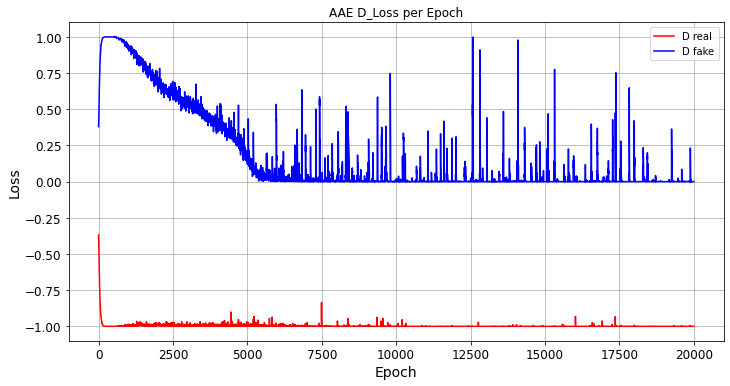

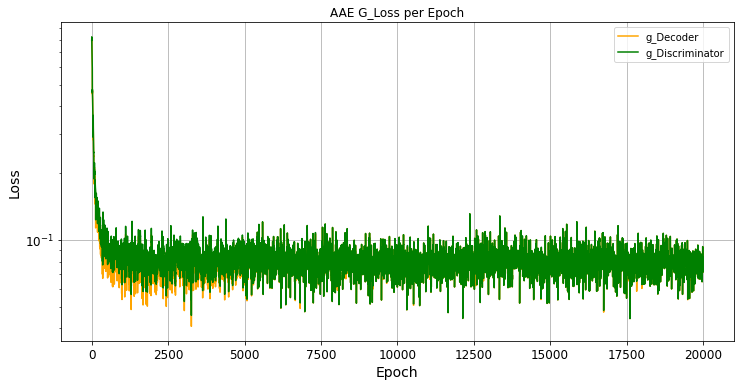

In [10]:
print('D_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.c1_hist, c='red')
ax.plot(aae.c2_hist, c='blue')

ax.legend(['D real', 'D fake'])
ax.grid()

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE D_Loss per Epoch")
plt.savefig('AAE/Losses/D_loss'+str(epochs)+'.png')

print('G_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.g1_hist, c='orange')
ax.plot(aae.g2_hist, c='green')

ax.legend(['g_Decoder', 'g_Discriminator'])
ax.grid()

plt.tight_layout()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE G_Loss per Epoch")
plt.savefig('AAE/Losses/G_loss'+'.png')



### predict from the decoder

In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

gm.predict([[0, 0], [12, 3]])


array([1, 0])

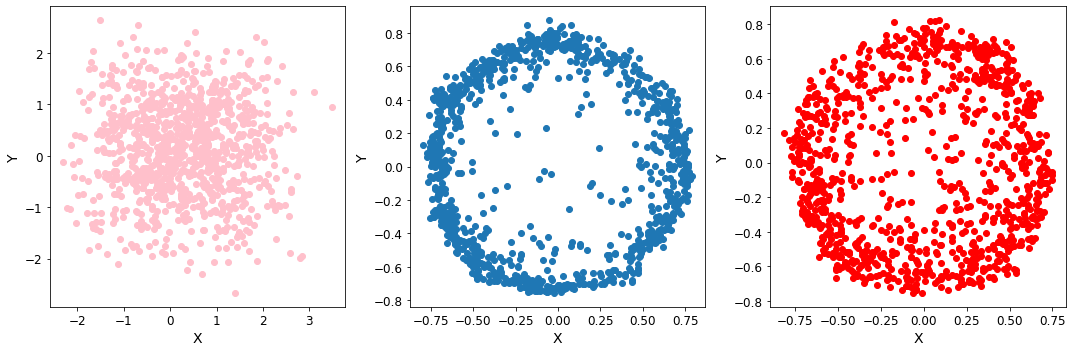

In [12]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction
#X, _ = make_swiss_roll(n_samples=int(self.batch_size*self.Z/3), noise=0.3)
#latent_values5 = X.reshape([1000,Z])
latent_values = tf.random.normal([1000, Z])
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
#predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",Z)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values5[:,0],predicted_values5[:,1],predicted_values5[:,2])
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    #ab = plt.subplot(projection='3d')
    #ab.scatter(latent_values5[:,0],latent_values5[:,1],latent_values5[:,2])
    #ab.set_ylabel('Y')
    #ab.set_zlabel('Z')
    #ab.set_xlabel('X')
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    #axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()
    plt.savefig('AAE/Result/'+str(epochs)+'.png')




### Applying the prediction function

input_test : (900, 2)


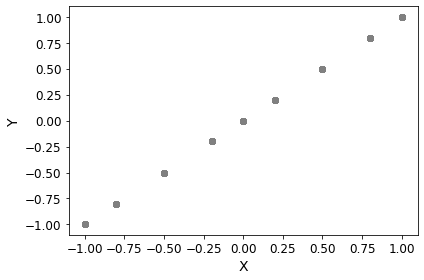

In [13]:
# define these for desired prediction
x_input =[-1.0,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.0]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
#predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [14]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

Generated Data: (899, 2)


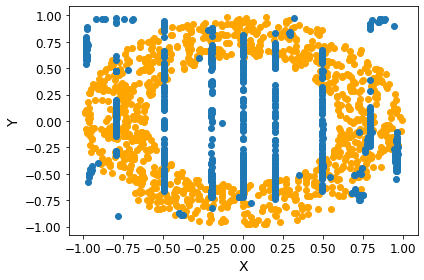

In [15]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    